In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
from importlib import reload
import warnings
from pprint import pprint
import string
import pyLDAvis.gensim as gensimvis
import pickle 
import pyLDAvis
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
STOPWORDS.update(["a","el","del","lo", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo",
 "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au",
 "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais",
 "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois",
 "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez",
 "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "b", "bah", "bas", "basee", "bat", "beau", "beaucoup",
 "bien", "bigre", "bon", "boum", "bravo", "brrr", "c", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là",
 "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain",
 "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun",
 "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine",
 "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables",
 "compris", "concernant", "contre", "couic", "crac", "d", "da", "dans", "de", "debout", "dedans", "dehors", "deja",
 "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels",
 "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different",
 "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement",
 "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit",
 "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début",
 "désormais", "e", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en",
 "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue",
 "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes",
 "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait",
 "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent",
 "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gens", "h", "ha", "haut", "hein", "hem", "hep",
 "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé",
 "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "k", "l", "la", "laisser",
 "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque",
 "lui", "lui-meme", "lui-même", "là", "lès", "m", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale",
 "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale",
 "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même",
 "mêmes", "n", "na", "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf",
 "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes",
 "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "o", "oh", "ohé", "ollé", "olé", "on", "ont", "onze",
 "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "o|", "où", "p",
 "paf", "pan", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant",
 "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne",
 "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf",
 "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour",
 "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement",
 "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "q",
 "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième",
 "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui",
 "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable",
 "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "s", "sa",
 "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble",
 "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez",
 "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens",
 "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous",
 "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles",
 "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet",
 "superpose", "sur", "surtout", "t", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement",
 "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi",
 "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres",
 "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "u", "un", "une", "unes",
 "uniformement", "unique", "uniques", "uns", "v", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt",
 "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous",
 "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "w", "x", "y", "z", "zut", "à", "â", "ça", "ès", "étaient", "étais",
 "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"])

In [3]:
warnings.filterwarnings("ignore")

In [4]:
import clean_tweets_dataframe as cld

In [5]:
reload(cld)

<module 'clean_tweets_dataframe' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\tweets_analyze\\clean_tweets_dataframe.py'>

In [6]:
df_tweet=pd.read_csv("processed_tweet_data.csv")

In [7]:
cleaner=cld.CleanTweets(df_tweet)

Automation in Action...!!!


**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [8]:
df_tweet=cleaner.drop_unwanted_column(df_tweet)
df_tweet=cleaner.drop_duplicate(df_tweet)
df_tweet=cleaner.convert_to_datetime(df_tweet)
df_tweet=cleaner.convert_to_numbers(df_tweet)
df_tweet=cleaner.remove_other_languages_tweets(df_tweet)
df_tweet=cleaner.treat_special_characters(df_tweet)

In [9]:
print(df_tweet.shape)
df_tweet

(854, 19)


,created_at,source,original_text,cleaned_text,polarity,subjectivity,sentiment,lang,likes_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,retweet_hashtags,user_mentions,place,place_coord_boundaries
8,2022-07-18 15:25:28+00:00,Twitter for Android,‘It shouldn’t be happening again’: #M23 rebels...,‘It shouldn’t be happening again’: rebels ret...,-0.075000,0.050000,Negative,en,0,9,Nduwamungu5,1579,418,False,PrimerasPáginas,NaN,EUwatchers,Valhalla,NaN
9,2022-07-18 15:21:48+00:00,EUwatch,European heat wave: Britain announces national...,European heat wave: Britain announces national...,0.000000,0.000000,Neutral,en,0,0,EUwatchers,25730,7621,False,Dictator,NaN,RepDeFiFidonia,República de fifidonia,NaN
17,2022-07-18 15:14:41+00:00,Microsoft Power Platform,Why are weather forecasts not always accurate?...,Why are weather forecasts not always accurate?...,0.400000,0.633333,Positive,en,0,0,123_INFO_DE,118,12,False,PrimerasPáginas,NaN,TheoMpoze,Mongwalu isiro aruwara,NaN
18,2022-07-18 15:10:04+00:00,Twitter for iPhone,Tried to draw Rovina Desamero of Dosage of Ser...,Tried to draw Rovina Desamero of Dosage of Ser...,0.000000,0.000000,Neutral,en,0,152,AriaSoondingie,621,1559,False,PrimerasPáginas,NaN,ILCAsia,"Cape town, south africa",NaN
19,2022-07-18 15:08:55+00:00,Twitter Web App,Spain: Picasso sketch seized by customs offici...,Spain: Picasso sketch seized by customs offici...,0.000000,0.000000,Neutral,en,0,1,arson_cole,235,1699,False,PrimerasPáginas,NaN,RepDeFiFidonia,"Seattle, wa",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10344,2022-07-11 17:02:30+00:00,Twitter for iPhone,Disney perderá pronto los derechos de autor de...,Disney perderá pronto los derechos de autor de...,0.375000,0.750000,Positive,fr,0,33,ngoyikabongo1,97,645,False,NaN,NaN,NaN,NaN,NaN
10371,2022-07-11 16:34:40+00:00,TweetCaster for Android,"Ciencia en #DW 🇩🇪 ""Estudio: La exposición al s...","Ciencia en 🇩🇪 ""Estudio: La exposición al sol ...",0.000000,0.000000,Neutral,en,1,0,egonwillighagen,5231,1268,False,NaN,NaN,NaN,NaN,NaN
10384,2022-07-11 16:22:10+00:00,Twitter for iPhone,Defence Ministry of Russia says Rwanda will pa...,Defence Ministry of Russia says Rwanda will pa...,-0.150000,0.200000,Negative,en,1,0,iamdedit,4786,3066,False,NaN,NaN,NaN,NaN,NaN
10394,2022-07-11 16:13:52+00:00,Twitter for Android,Srebrenica massacre: Netherlands apologizes af...,Srebrenica massacre: Netherlands apologizes af...,0.000000,0.000000,Neutral,en,0,236,steverukundo,1214,2067,True,NaN,NaN,NaN,NaN,NaN


In [10]:
df_tweet['lang'].value_counts()

en      619
fr      183
kiny     52
Name: lang, dtype: int64

###  Export french tweets, make translation and insert back new translated tweets

In [11]:
df_trans=df_tweet.query("lang=='fr'| lang =='kiny'")[['original_text','cleaned_text','lang']]
df_trans.to_csv('df_to_translate.csv')

In [14]:
# translation completed

In [15]:
dict_to_translate=df_tweet.query("lang=='fr'| lang =='kiny'")['cleaned_text'].to_dict()

dict_translated=pd.read_csv('df_translated.csv',index_col=0,usecols=[0,4]).to_dict()['translation']

In [16]:
for idx in dict_to_translate.keys():
    df_tweet.loc[idx, 'cleaned_text'] = dict_translated[idx]

In [17]:
from textblob import TextBlob

In [18]:
for idx in dict_translated.keys():
    blob = TextBlob(dict_translated[idx])
    pol=blob.sentiment.polarity
    df_tweet.loc[idx, 'sentiment'] = 'Positive' if pol>0 else ('Negative' if pol < 0 else 'Neutral')

#### Save new dataframe for dashboard creation

In [19]:
df_tweet.to_csv('sql_dashboard/processed_tweet_data.csv')

In [20]:
d_mostflwd=df_tweet[['original_author']]

In [21]:
d_mostflwd['hh']=d_mostflwd['original_author'].apply(lambda x : '['+x+']'+'(https://twitter.com/'+str(x)+')')

In [22]:
d_mostflwd

,original_author,hh
8,Nduwamungu5,[Nduwamungu5](https://twitter.com/Nduwamungu5)
9,EUwatchers,[EUwatchers](https://twitter.com/EUwatchers)
17,123_INFO_DE,[123_INFO_DE](https://twitter.com/123_INFO_DE)
18,AriaSoondingie,[AriaSoondingie](https://twitter.com/AriaSoond...
19,arson_cole,[arson_cole](https://twitter.com/arson_cole)
...,...,...
10344,ngoyikabongo1,[ngoyikabongo1](https://twitter.com/ngoyikabon...
10371,egonwillighagen,[egonwillighagen](https://twitter.com/egonwill...
10384,iamdedit,[iamdedit](https://twitter.com/iamdedit)
10394,steverukundo,[steverukundo](https://twitter.com/steverukundo)


### EDA of Tweets

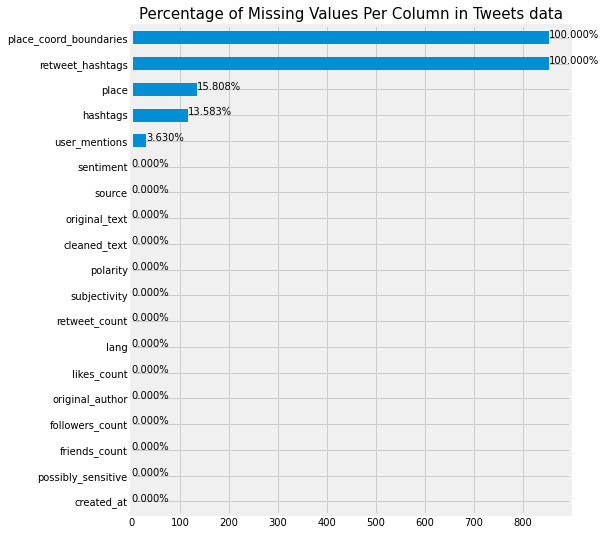

In [23]:
# Check the percentage of missing values in every column
ax = df_tweet.isna().sum().sort_values().plot(kind = 'barh', figsize = (7, 9))
plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df_tweet.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

<AxesSubplot:ylabel='Place'>

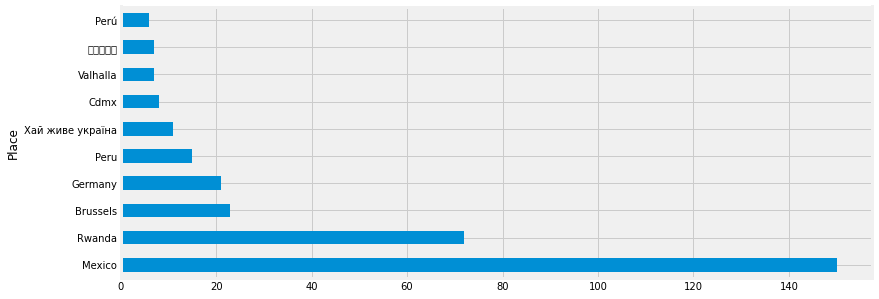

In [24]:
df_tweet['place'].value_counts(sort=True, ascending=False)[:10].plot(kind='barh',
                                                                     figsize=(12,5),xlabel='Place')

In [25]:
df_tweet_date=df_tweet.set_index('created_at')

<AxesSubplot:xlabel='Date,time'>

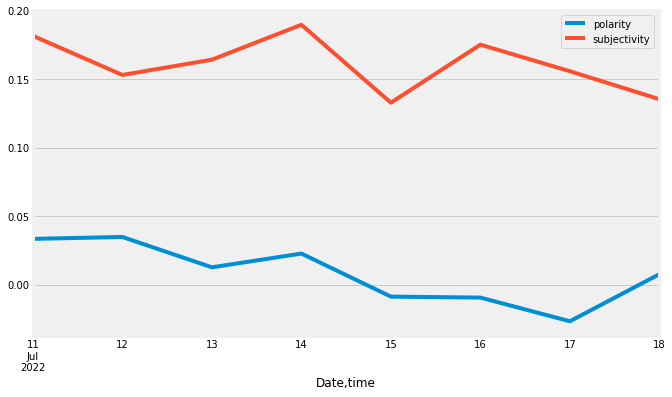

In [26]:
df_tweet_date.resample('D').mean()[['polarity','subjectivity']].dropna().plot(figsize=(10,6),xlabel='Date,time')

### uni-variate Analysis on Hashtags


In [27]:
hashtag_df=df_tweet[['original_text','hashtags','retweet_hashtags']]

In [28]:
def find_hashtags(df_tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df_tweet)

hashtag_df['hashtag_check']=df_tweet.original_text.apply(find_hashtags)

In [29]:
hashtag_df.dropna(subset=['hashtag_check'],inplace=True)

In [30]:
tags_list=list(hashtag_df['hashtag_check'])

In [31]:
hashtags_list_df = pd.DataFrame([tag for tags_row in tags_list for tag in tags_row],columns=['hashtag'])

In [32]:
hashtags_list_df

,hashtag
0,#M23
1,#DRC
2,#Kivu
3,#RDF
4,#Kagame
...,...
477,#DW
478,#FactsOnRwanda
479,#RwOT
480,#FactsOnRwanda


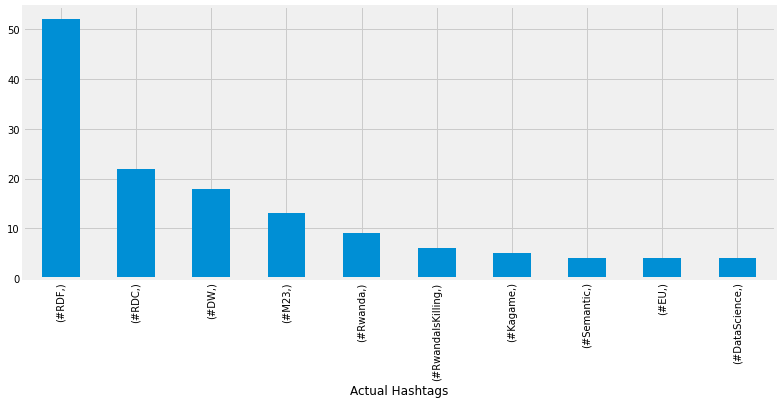

In [33]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Actual Hashtags')

In [34]:
#Convert hastags to lowercase
hashtags_list_df['hashtag'] = hashtags_list_df['hashtag'].str.lower()

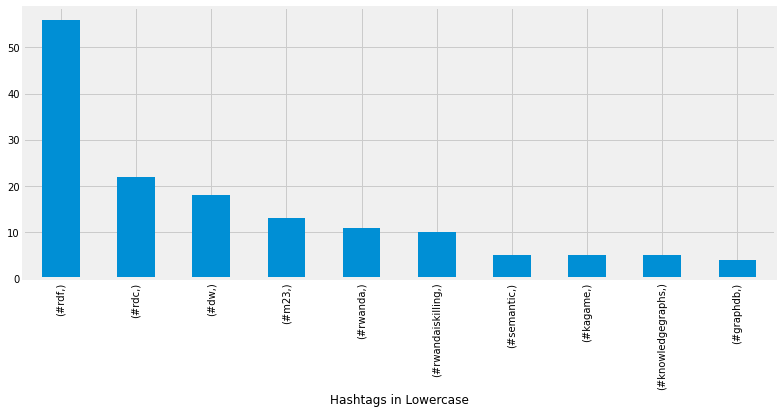

In [35]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Hashtags in Lowercase')

In [36]:
user_summary=df_tweet.groupby('original_author').agg({'cleaned_text':'count','followers_count':'max',
                                         'polarity':'mean','subjectivity':'mean', 'sentiment':pd.Series.mode})

In [37]:
user_summary.sort_values(by='cleaned_text',ascending=False).head(10)

,cleaned_text,followers_count,polarity,subjectivity,sentiment
original_author,,,,,
Noticieros_MEX,52,4915,-0.038301,0.195272,Neutral
123_INFO_DE,32,118,-0.032210,0.165744,Neutral
EUwatchers,32,25730,0.003255,0.067708,Neutral
rogue_corq,25,1834,-0.057308,0.123755,Neutral
EtudesRwanda,17,500,0.030080,0.070856,Positive
East_DRC_News,12,1262,0.011364,0.089962,Neutral
bouche_bee,11,2836,0.043647,0.125189,Neutral
PhotoFinishBot,8,131,0.000000,0.000000,Neutral
arson_cole,4,235,-0.029630,0.057407,Neutral


Sentiment summary of the tweets

In [38]:
text_grouped = df_tweet.groupby('sentiment').count()['cleaned_text'].reset_index()

In [39]:
text_grouped

,sentiment,cleaned_text
0,Negative,135
1,Neutral,528
2,Positive,191


<AxesSubplot:xlabel='sentiment', ylabel='count'>

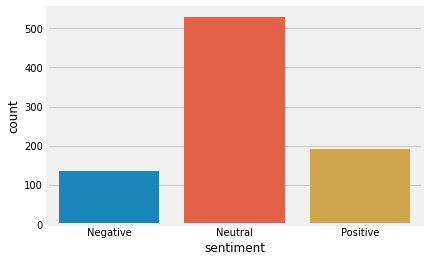

In [40]:
sns.countplot(x='sentiment', data=df_tweet)

**Most frequent words in our tweets dataset**

In [41]:
english_tweets=cleaner.remove_other_languages_tweets(df_tweet)

In [42]:
# text Preprocessing
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].str.lower()
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [43]:
all_words=' '.join(english_tweets.cleaned_text.values)
wordcloud_obj=WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(all_words)

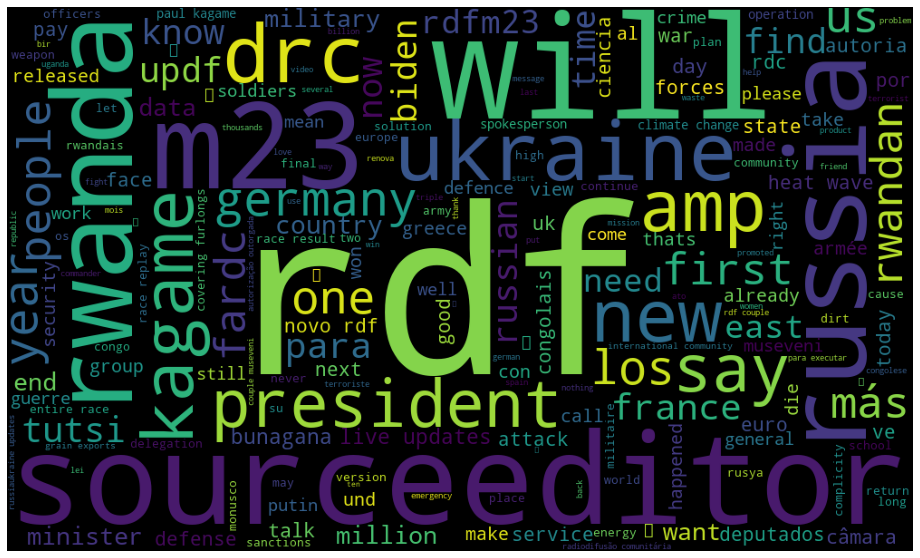

In [44]:
plt.figure(figsize=(20, 10))

fgg=plt.imshow(wordcloud_obj)
plt.axis('off')
# plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [45]:
fgg.figure.savefig('sql_dashboard/cw_rdf.png',bbox_inches='tight',pad_inches=0)

### Topic modeling

In [46]:
def preprocess_data(tweets_df):
    # Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['cleaned_text']]
    word_list = [sent.split() for sent in sentence_list]
    #Save only words and excludes emojis, punctuations
    word_list_new=[]
    for sent in word_list:
        word_list_new.append([re.split(r'\W+',word) for word in sent if word not in STOPWORDS and not word.isdigit()])
    
    word_list_final=[]
    for sent in word_list_new:
        word_list_final.append([i[0] for i in sent])
    # Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list_final)
    corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list_final]

    return word_list_final, word_to_id, corpus_1

In [47]:
word_list, id2word, corpus=preprocess_data(english_tweets)

In [48]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)

In [49]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('m23', 0.012394749),
   ('', 0.00787077),
   ('rdf', 0.0075262007),
   ('l', 0.0065509714),
   ('rwanda', 0.0064105606),
   ('amp', 0.0055939998),
   ('pays', 0.00524817),
   ('fardc', 0.005048856),
   ('tutsi', 0.004235915),
   ('guerre', 0.0038023044)]),
 (1,
  [('rdf', 0.027506985),
   ('', 0.016385546),
   ('first', 0.006509893),
   ('drc', 0.005721718),
   ('james', 0.005682138),
   ('kagame', 0.00525465),
   ('war', 0.004656766),
   ('commander', 0.0044067726),
   ('race', 0.004364168),
   ('gen', 0.004120533)]),
 (2,
  [('', 0.04257071),
   ('will', 0.01078126),
   ('rdf', 0.010004007),
   ('los', 0.0078041595),
   ('live', 0.0055995164),
   ('one', 0.0052418835),
   ('security', 0.0050964667),
   ('defence', 0.004277714),
   ('country', 0.0042730267),
   ('army', 0.004170317)]),
 (3,
  [('', 0.014209535),
   ('sourceeditor', 0.0122081665),
   ('ukraine', 0.011373916),
   ('rdf', 0.011071558),
   ('para', 0.009184918),
   ('military', 0.008597936),
   ('general', 0.0072

### Model Analysis

In [50]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# doc_lda = lda_model[corpus]

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -8.79830838071918

 Ldamodel Coherence Score/Accuracy on Tweets:  0.5065802585219119


**Model 1 words with some digits, 5 topics**

Perplexity:  -9.857909007134007\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4242327533406264

**Model 2 words without digits, 5 topics**

Perplexity:  -9.82031321033761\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4368570452021986

In [51]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.091773  0.099418       1        1  22.147195
1     -0.107154 -0.139984       2        1  21.397804
0      0.070251  0.117352       3        1  20.574763
3     -0.034176  0.008198       4        1  19.709617
4      0.162852 -0.084984       5        1  16.170621, topic_info=              Term        Freq       Total Category  logprob  loglift
9              m23   27.000000   27.000000  Default  30.0000  30.0000
35             rdf  125.000000  125.000000  Default  29.0000  29.0000
0                   196.000000  196.000000  Default  28.0000  28.0000
25    sourceeditor   29.000000   29.000000  Default  27.0000  27.0000
2048       ukraine   25.000000   25.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
2521          tras    3.746719    4.274698   Topic5  -6.1267   1.6901
2592       article    3.838534    4.385670   Topic5  -6.1025   1.6887
608      wildfires    3.505634    4.031316   Topic5  -6.1932   1.6823
3061           bir    4.336667    7.358514   Topic5  -5.9805   1.2932
0                    12.352899  196.483110   Topic5  -4.9337  -0.9447

[220 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.508950         
0         2  0.188311         
0         3  0.086521         
0         4  0.152685         
0         5  0.061074         
...     ...       ...      ...
1070      2  0.923775      won
758       1  0.834610  working
18        4  0.926822    years
4607      2  0.880978       yg
1149      3  0.929654        क

[210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])

###  END

**Number of Topics optimatization**

As we can see the coherence accuracy increases with number of topics which is expected but again \
many topics again would lead to meaningless conclusion. Let's use elbow method to find optimum number of topics

In [53]:
# # Find best LDA Model considering different number of topics

# params_dic={'topics_number':[],'coherence':[],'perplexity':[]}
# for top_number in range(1,10):
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=top_number, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha='auto',
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic['topics_number'].append(top_number)
#     params_dic['coherence'].append(coherence_lda)
#     params_dic['perplexity'].append(perplexity)

In [54]:
# pd.DataFrame(params_dic).plot(y=['coherence'])
# # pd.read_csv("elbow_metrics.csv",index_col=0).plot(y=['coherence'])

In [ ]:
# import numpy as np

In [ ]:
# alphas = list(np.arange(0.01, 3, 0.1))
# alphas.append('symmetric')
# alphas.append('asymmetric')
# alphas.append('auto')

In [ ]:
# # Find best LDA Model considering different number of alpha

# params_dic_alpha={'alpha':[],'coherence':[],'perplexity':[]}
# for alpha in alphas:
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=7, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha=alpha,
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic_alpha['alpha'].append(alpha)
#     params_dic_alpha['coherence'].append(coherence_lda)
#     params_dic_alpha['perplexity'].append(perplexity)

In [ ]:
# pd.DataFrame(params_dic_alpha).plot(y='coherence')#.sort_values('coherence',ascending=False)

**Model with selected optimum parameters**

In [ ]:
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                            id2word=id2word,
#                                            num_topics=7, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=0.1,
#                                            per_word_topics=False)

In [ ]:
# pprint(lda_model.show_topics(formatted=False))

In [ ]:
# # Compute Perplexity
# #It's a measure of how good the model is. The lower the better. Perplexity is a negative value
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# # doc_lda = lda_model[corpus]

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

In [ ]:
# # Visualize the topics
# pyLDAvis.enable_notebook()

# LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# LDAvis_prepared